# Power calculations for APPI creche study
This notebook calculates very approximate 

Inputs and assumptions:
1. We will sample from lists of pregnant women collected by anganwadis in all areas.
    1. Note that we can't use the creche list since we don't have this in control
    2. Note also that this means that our main estimate will be for all children in the target areas (not just those who show up at the creche)
3. Autocorrelation = .5
    1. According to McKenzie's "Beyond Baseline and End line" article (p 219) autocorrelation for anthropometric data tends to be betwee .6 and .8.  Since our measurements are quite far apart (16 months or so) 
4. K = 15 
5. No covariates at either the school or teacher level
    1. This is probably reasonable since covariates will affect with precision but our samples will be slightly less balanced
6. ICC = .08 
    1. Not sure where we got this from. 

The formula for MDE given the other inputs is...

$$ MDE = 2M_J\sigma_y\sqrt{\frac{\rho}{J}+\frac{(1-\rho)(1-R^2_k)}{JK}} $$

Where...

$$ M_J = F^{-1}_t\left(1-\frac{\alpha}{2},J\right) - F^{-1}_t\left(1-\beta,J\right) $$

And J is number of schools in both treatment and control (combined!!!), K is number of teachers per school, and $\sigma_y$ is the standard deviation of the outcome variable.

In [1]:
import scipy.stats as stats

# hard code assumptions
std = (.35*.65)**.5
J = 300 # J = number of schools in both treatment and control combined!!!
alpha = .05
rsqk = .36

# define function for calculating MDE
def mde(J,K,alpha, rho, std, rsqk = 0.0, num_test =1, power = 0.8):
    adj_alpha = alpha/num_test
    M = stats.t.ppf(1-adj_alpha/2,J)+stats.t.ppf(power,J)
    mde = 2*M*std*((rho/J) +((1-rho)*(1-rsqk))/(J*K))**.5
    return mde

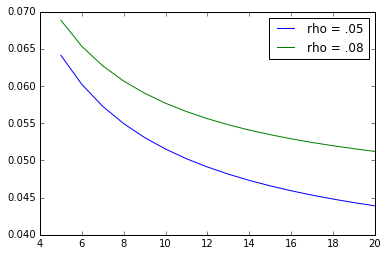

In [2]:
# MDE versus number of teachers per school for various values of K
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# set range for k, the number of children we collect data for per creche
ran = np.arange(5,21)

# calculate MDEs assuming rho = .05 for range of values for k
y = np.asarray([mde(J,k,alpha, .05, std, rsqk) for k in ran])
plt.plot(ran,y, label = 'rho = .05')

# calcualte MDEs assuming rho = .08 for range of values for k
y2 = np.asarray([mde(J,k,alpha, .08, std, rsqk) for k in ran])
plt.plot(ran,y2, label = 'rho = .08')
plt.legend()

In [3]:
mde(J,6,alpha, .08, std, rsqk)

0.065335748622230821

# Stata code
The following Stata code attempts to replicate the code above. Note that the MDEs are about one percentage point lower when calculated using Stata.   

For J = 10 and rho = .08 MDE = 7.5 percentage points
> sampsi 0.35 0.275, sd(0.5) alpha (0.05) r01(.6) pre(1) post(1) power(.8) method(ancova)

> sampclus, obsclus(10) rho(0.08)


For J = 10 and rho = .05 MDE = 7 percentage points
> sampsi 0.35 0.28, sd(0.5) alpha (0.05) r01(.6) pre(1) post(1) power(.8) method(ancova)

> sampclus, obsclus(10) rho(0.05)

For J = 20 and rho = .08 MDE = 6.5 percentage points
> sampsi 0.35 0.285, sd(0.5) alpha (0.05) r01(.6) pre(1) post(1) power(.8) method(ancova)

> sampclus, obsclus(20) rho(0.08)

For J = 20 and rho = .05 MDE = 5.7 percentage points
> sampsi 0.35 0.293, sd(0.5) alpha (0.05) r01(.6) pre(1) post(1) power(.8) method(ancova)

> sampclus, obsclus(20) rho(0.05)


